# 35. Compare our stage 2 results to Shizhong's (again)

We're doing this again after latest effort to correct flipped allele issue.

In [1]:
library(data.table)
library(stringr)

## All chr combined

In [2]:
#system("cat /expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_a2_caud/*scz_alleleprocessed_results.csv | awk 'NR == 1 || FNR > 1' > 35-intermediate_merged_outputs.csv")

In [3]:
# list.files("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_a2_caud/")

# library(data.table)
# library(stringr)

# merged <- fread("35-intermediate_merged_outputs.csv")

# head(merged)

## One chr at a time

In [4]:
getwd()

[1] "/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/scripts"

In [5]:
# # Extract all files and group by chromosome number
# files <- list.files("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_a2_caud",
#                     pattern = "scz_alleleprocessed_results.csv$", full.names = TRUE)

# # Loop through chromosomes 1 to 22
# for (chr in 1:22) {
#   print(chr)
#   # Filter files for the current chromosome
#   chr_files <- files[grep(paste0("chr", chr, "-"), files)]
#   if(length(chr_files) == 0) next
#   print(head(chr_files))
#   # Construct output filename
#   output_file <- paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_a2_caud/chr", chr, "_merged.csv")
  
#   # Combine files using system call to bash
#   system(paste0("cat ", paste(chr_files, collapse = " "), " | awk 'NR == 1 || FNR > 1' > ", output_file))
# }


## Now load chr21 and plot vs. Shizhong's results

### Load ours

In [6]:
# Load the data
merged <- fread("/expanse/lustre/projects/jhu152/naglemi/mwas/CpGWAS/output_EXPANSE_a2_caud/chr21_merged.csv")

In [7]:
head(merged)

z,p,n,bp
<chr>,<chr>,<chr>,<chr>
-0.00800040002666779,0.993616672434185,1,28580399
-0.00800040002666779,0.993616672434185,1,28580582
-0.00800040002666779,0.993616672434185,1,28580585
-0.00800040002666779,0.993616672434185,1,28580724
-1.03181583866145,0.302158398026121,1,28581023
-0.653637983620047,0.513345066723607,1,28581397


In [8]:
# Rename columns
colnames(merged) <- c("Z.lambda.1se", "pval.lambda.1se", "N", "BP")

# Create a copy before conversion
merged_chr <- merged

# Convert all columns to numeric, coercing non-numeric values to NA
merged <- merged[, lapply(.SD, as.numeric)]

# Find rows that contain NA in the converted data
na_rows_indices <- which(apply(merged, 1, function(row) any(is.na(row))))

# Access the same rows in the original data (before conversion)
merged_chr_sub <- merged_chr[na_rows_indices, ]

# Print the non-numeric rows that caused NA values
print(head(merged_chr_sub))


Warning message in lapply(.SD, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(.SD, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(.SD, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(.SD, as.numeric):
“NAs introduced by coercion”


   Z.lambda.1se pval.lambda.1se      N       BP
         <char>          <char> <char>   <char>
1:                                  12 29003592
2:                                  13 29003722
3:                                  14 29003803
4:                                  17 29003836
5:                                  10 29004592
6:                                   8 29004679


In [9]:
dim(merged_chr_sub)

[1] 6988    4

In [10]:
dim(merged_chr)

[1] 787668      4

In [11]:
head(merged)

Z.lambda.1se,pval.lambda.1se,N,BP
<dbl>,<dbl>,<dbl>,<dbl>
-0.0080004,0.9936167,1,28580399
-0.0080004,0.9936167,1,28580582
-0.0080004,0.9936167,1,28580585
-0.0080004,0.9936167,1,28580724
-1.0318158,0.3021584,1,28581023
-0.6536380,0.5133451,1,28581397


In [12]:
merged <- na.omit(merged)

### Load Shizhong's

In [13]:
old <- fread("mwas.all.wind.10000")

In [14]:
head(old)

chr,pos_hg38,z,p
<chr>,<dbl>,<dbl>,<dbl>
chr1,1104982,0.8199803,0.4122274
chr1,1104984,0.8363752,0.4029439
chr1,1105038,0.7885519,0.4303740
chr1,1105092,0.7844246,0.4327910
chr1,1105200,0.8570140,0.3914372
chr1,1105299,0.7617538,0.4462070


In [15]:
colnames(old) <- c("CHR", "BP", "Z.shizhongs_old", "pval.shizhongs_old")

In [16]:
old$CHR <- gsub("chr", "", old$CHR)
old$CHR <- as.numeric(old$CHR)

In [17]:
old$SNP <- paste0("Chr", old$CHR, ":", old$BP)

In [18]:
head(old)

CHR,BP,Z.shizhongs_old,pval.shizhongs_old,SNP
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1104982,0.8199803,0.4122274,Chr1:1104982
1,1104984,0.8363752,0.4029439,Chr1:1104984
1,1105038,0.7885519,0.4303740,Chr1:1105038
1,1105092,0.7844246,0.4327910,Chr1:1105092
1,1105200,0.8570140,0.3914372,Chr1:1105200
1,1105299,0.7617538,0.4462070,Chr1:1105299


In [19]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





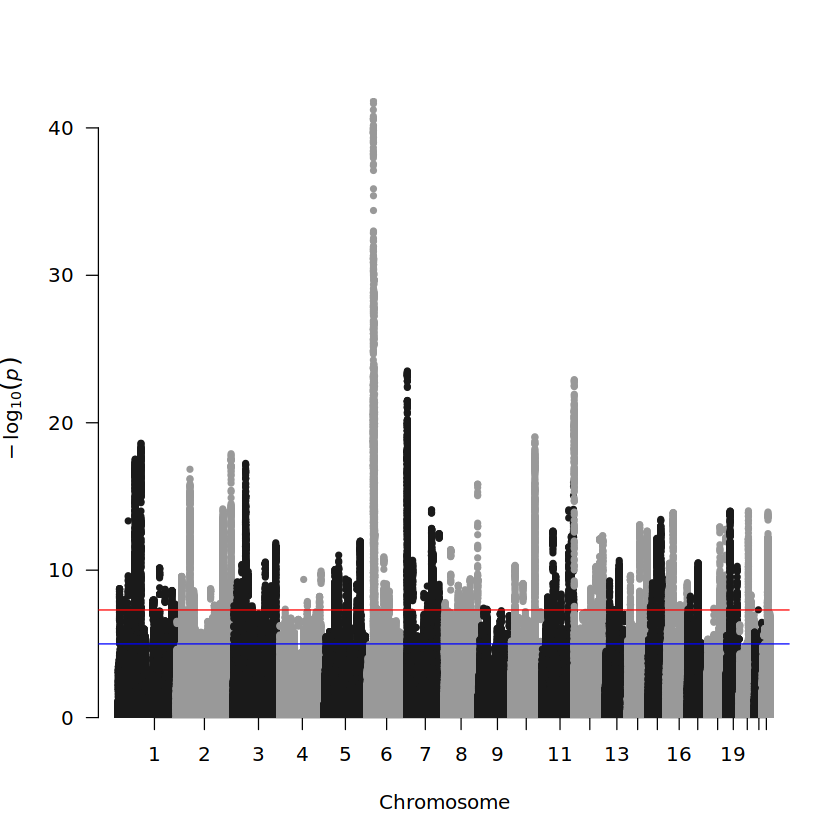

In [20]:
manhattan(old, p = "pval.shizhongs_old")

### Merging/overlap of Shizhong's results, ours.

In [21]:
head(old)

CHR,BP,Z.shizhongs_old,pval.shizhongs_old,SNP
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1104982,0.8199803,0.4122274,Chr1:1104982
1,1104984,0.8363752,0.4029439,Chr1:1104984
1,1105038,0.7885519,0.4303740,Chr1:1105038
1,1105092,0.7844246,0.4327910,Chr1:1105092
1,1105200,0.8570140,0.3914372,Chr1:1105200
1,1105299,0.7617538,0.4462070,Chr1:1105299


In [22]:
head(merged)

Z.lambda.1se,pval.lambda.1se,N,BP
<dbl>,<dbl>,<dbl>,<dbl>
-0.0080004,0.9936167,1,28580399
-0.0080004,0.9936167,1,28580582
-0.0080004,0.9936167,1,28580585
-0.0080004,0.9936167,1,28580724
-1.0318158,0.3021584,1,28581023
-0.6536380,0.5133451,1,28581397


In [23]:
merged$CHR <- 21

In [24]:
merged <- merge(old, merged, by = c())

In [25]:
head(merged)

CHR,BP,Z.shizhongs_old,pval.shizhongs_old,SNP,Z.lambda.1se,pval.lambda.1se,N
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
21,14063726,-1.813170,0.06980566,Chr21:14063726,1.680806,0.09280059,6
21,14063726,-1.813170,0.06980566,Chr21:14063726,1.790104,0.07343712,6
21,14063734,-1.834237,0.06661875,Chr21:14063734,-1.439539,0.14999794,1
21,14063734,-1.834237,0.06661875,Chr21:14063734,1.629951,0.10311181,5
21,14063734,-1.834237,0.06661875,Chr21:14063734,1.744499,0.08107203,6
21,14063750,-1.816273,0.06932853,Chr21:14063750,-1.439539,0.14999794,1


In [26]:
min(merged$pval.lambda.1se)

[1] 2.531411e-06

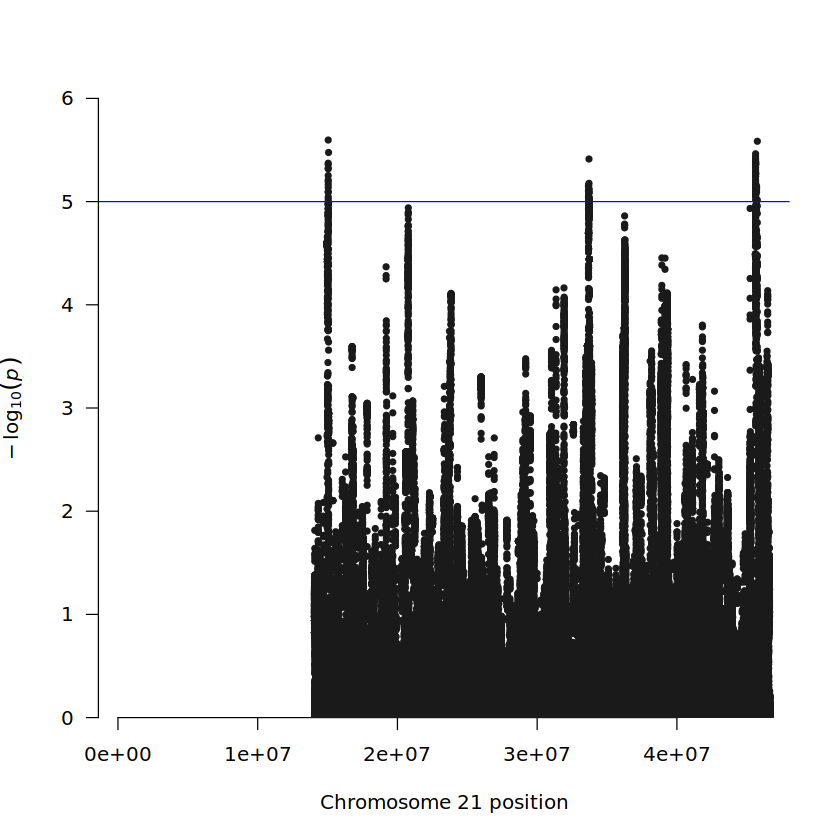

In [27]:
manhattan(merged, p = "pval.lambda.1se")

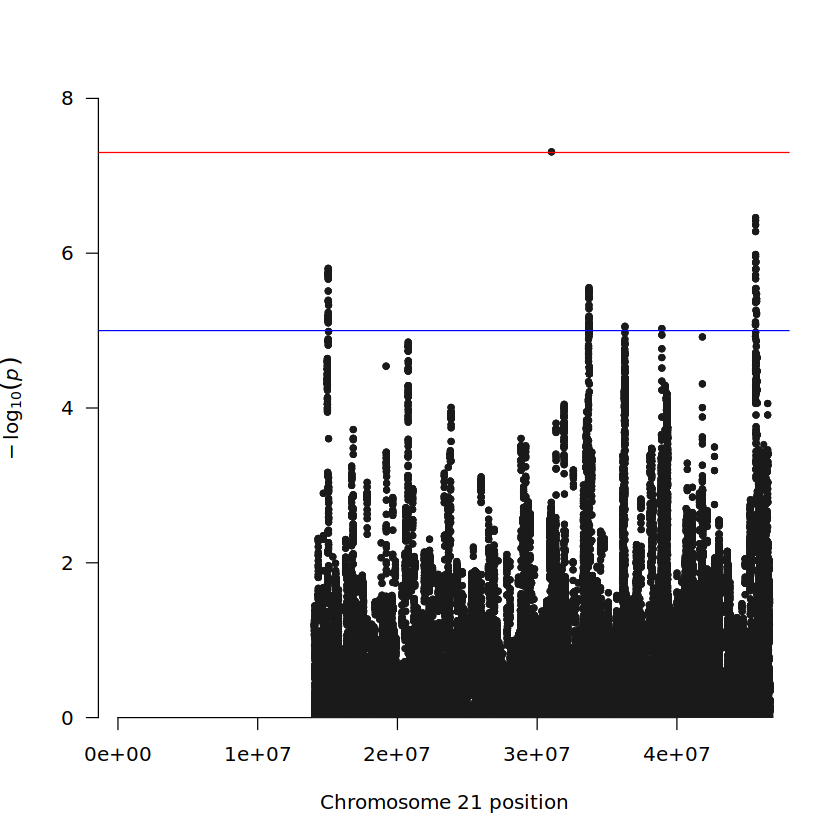

In [28]:
manhattan(merged, p = "pval.shizhongs_old")

### Among those found in both, what is agreement?

In [29]:
head(merged)

CHR,BP,Z.shizhongs_old,pval.shizhongs_old,SNP,Z.lambda.1se,pval.lambda.1se,N
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
21,14063726,-1.813170,0.06980566,Chr21:14063726,1.680806,0.09280059,6
21,14063726,-1.813170,0.06980566,Chr21:14063726,1.790104,0.07343712,6
21,14063734,-1.834237,0.06661875,Chr21:14063734,-1.439539,0.14999794,1
21,14063734,-1.834237,0.06661875,Chr21:14063734,1.629951,0.10311181,5
21,14063734,-1.834237,0.06661875,Chr21:14063734,1.744499,0.08107203,6
21,14063750,-1.816273,0.06932853,Chr21:14063750,-1.439539,0.14999794,1


In [30]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Assuming 'merged' is your dataframe
# You may have already set the column names as shown in your previous message

# Convert BP to numeric if not already
merged$BP <- as.numeric(merged$BP)

# Convert p-values to their -log10 for visualization
merged$log_pval_shizhong <- -log10(merged$pval.shizhongs_old)
merged$log_pval_lambda_1se <- -log10(merged$pval.lambda.1se)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




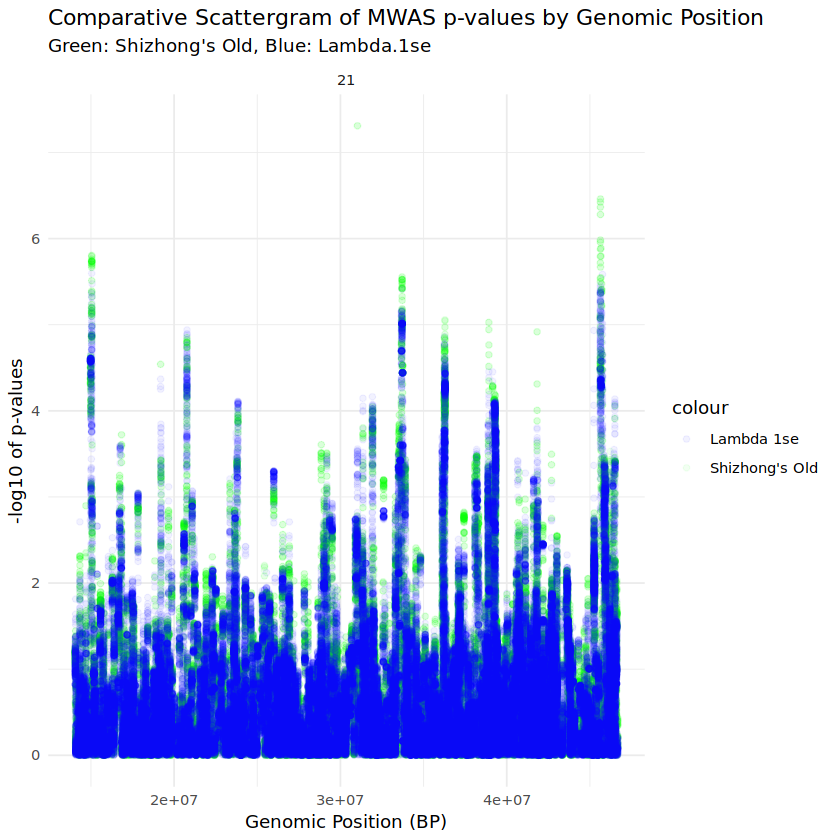

In [31]:
# Create the ggplot visualizations
plot <- ggplot(merged, aes(x = BP)) +
  geom_point(aes(y = log_pval_shizhong, color = "Shizhong's Old"), alpha = 0.05) +
  geom_point(aes(y = log_pval_lambda_1se, color = "Lambda 1se"), alpha = 0.05) +
  scale_color_manual(values = c("Shizhong's Old" = "green", "Lambda 1se" = "blue", "Lambda Min" = "red")) +
  labs(x = "Genomic Position (BP)",
       y = "-log10 of p-values",
       title = "Comparative Scattergram of MWAS p-values by Genomic Position",
       subtitle = "Green: Shizhong's Old, Blue: Lambda.1se") +
  theme_minimal() +
  facet_wrap(~ CHR, scales = "free_y")  # Facet by chromosome

# Print the plot
print(plot)


In [32]:
library(ggplot2)
library(tidyr)
library(scales)  # for comma formatting

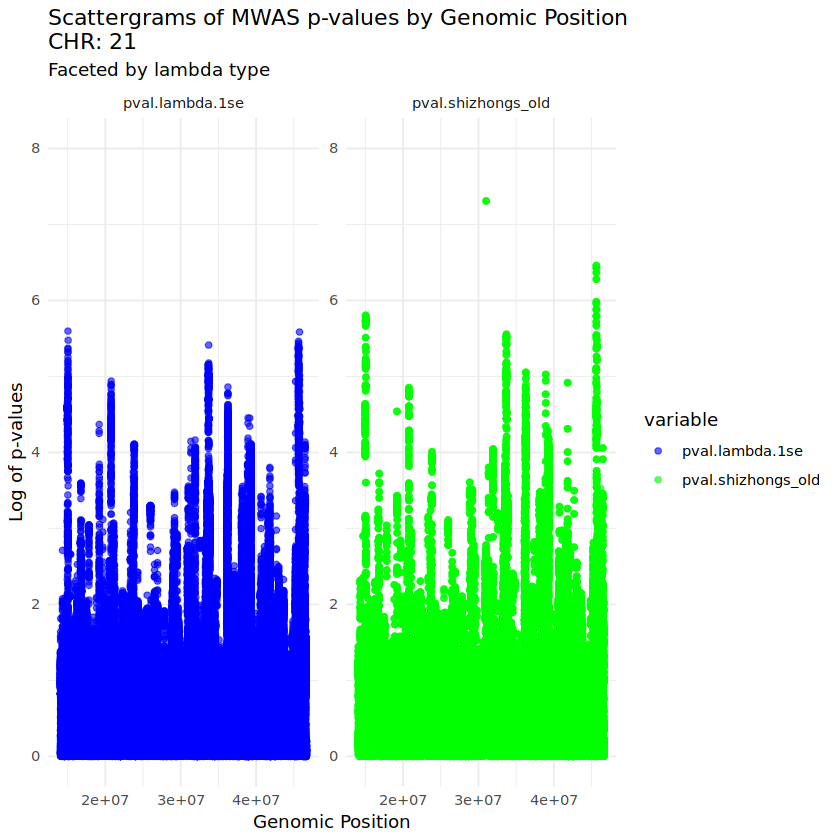

In [33]:
library(data.table)
library(ggplot2)
library(scales)
library(tidyr)

# Convert 'BP' to numeric
merged$BP <- as.numeric(merged$BP)

# Minimum p-values
min_pval_lambda.1se <- min(merged$pval.lambda.1se)
min_pval_shizhongs_old <- min(merged$pval.shizhongs_old)


# Convert data to long format
df_long <- pivot_longer(merged, cols = c("pval.lambda.1se", "pval.shizhongs_old"), 
                        names_to = "variable", values_to = "pval")

# Plot with detailed title
ggplot(df_long, aes(x = BP, y = -log10(pval), color = variable)) +
  geom_point(alpha = 0.6) +
  labs(x = "Genomic Position",
       y = "Log of p-values",
       title = paste("Scattergrams of MWAS p-values by Genomic Position\nCHR:", unique(merged$CHR)),
       subtitle = "Faceted by lambda type") +
  scale_color_manual(values = c("pval.lambda.1se" = "blue", "pval.shizhongs_old" = "green")) +
  facet_wrap(~ variable, scales = "free_y") +
  theme_minimal() + 
  ylim(c(0, 8))


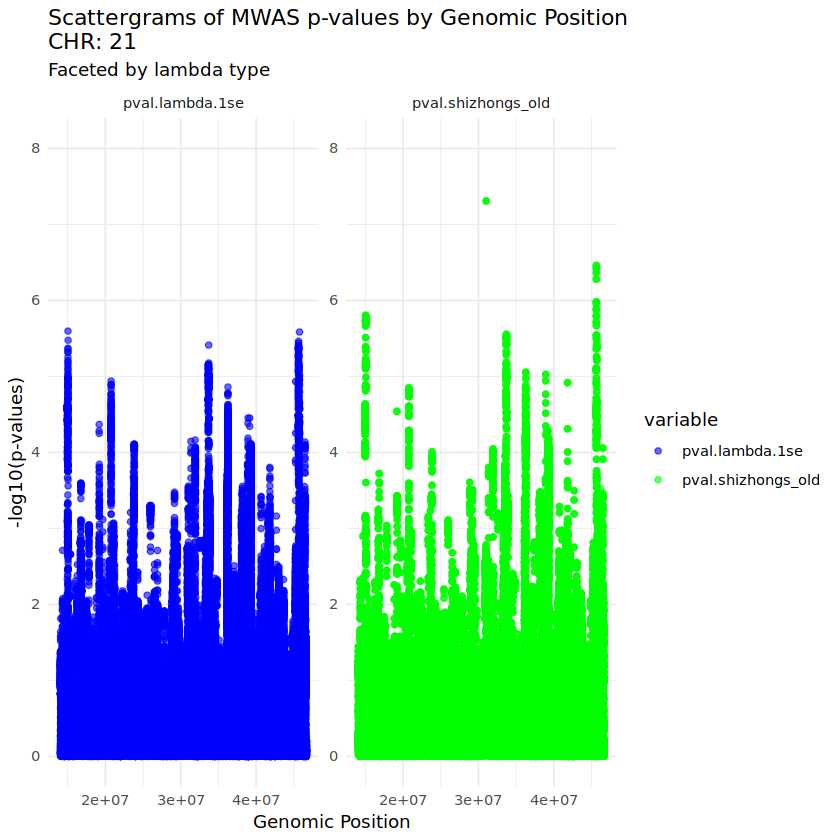

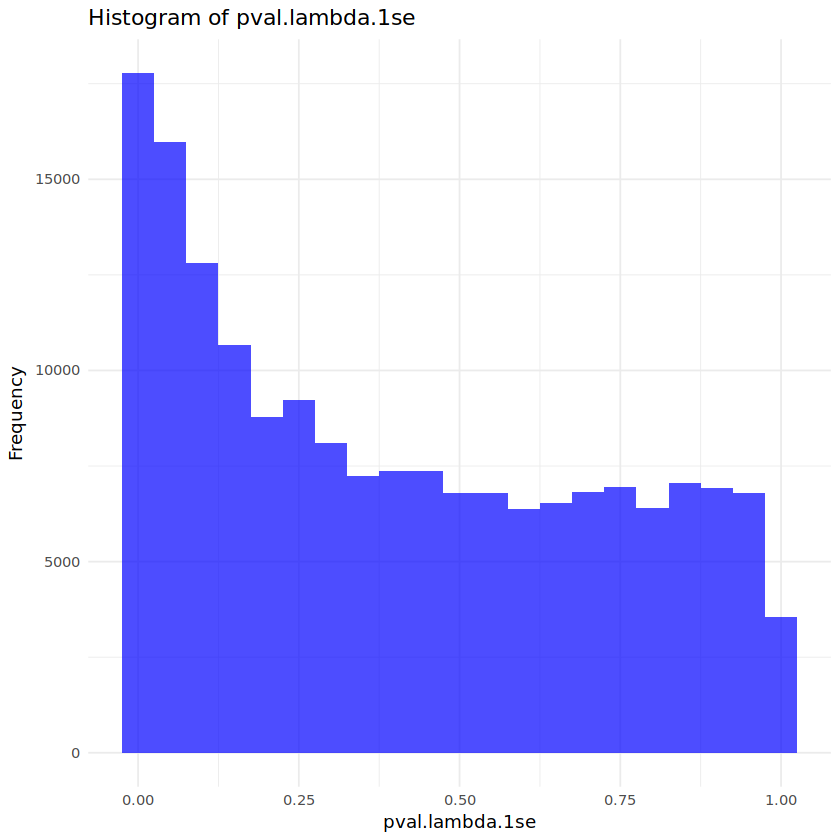

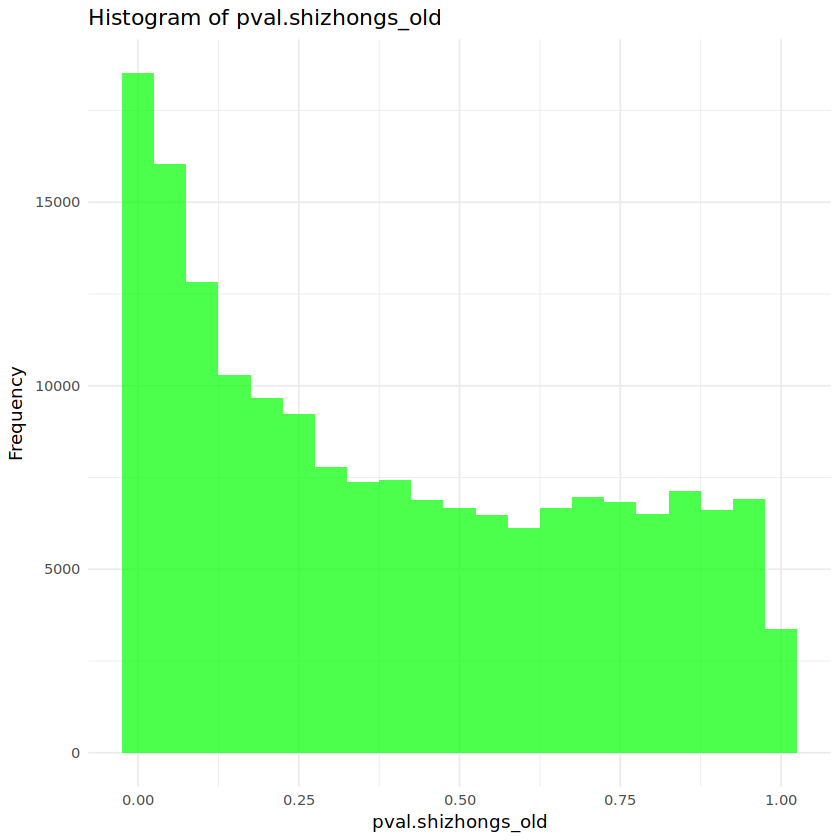

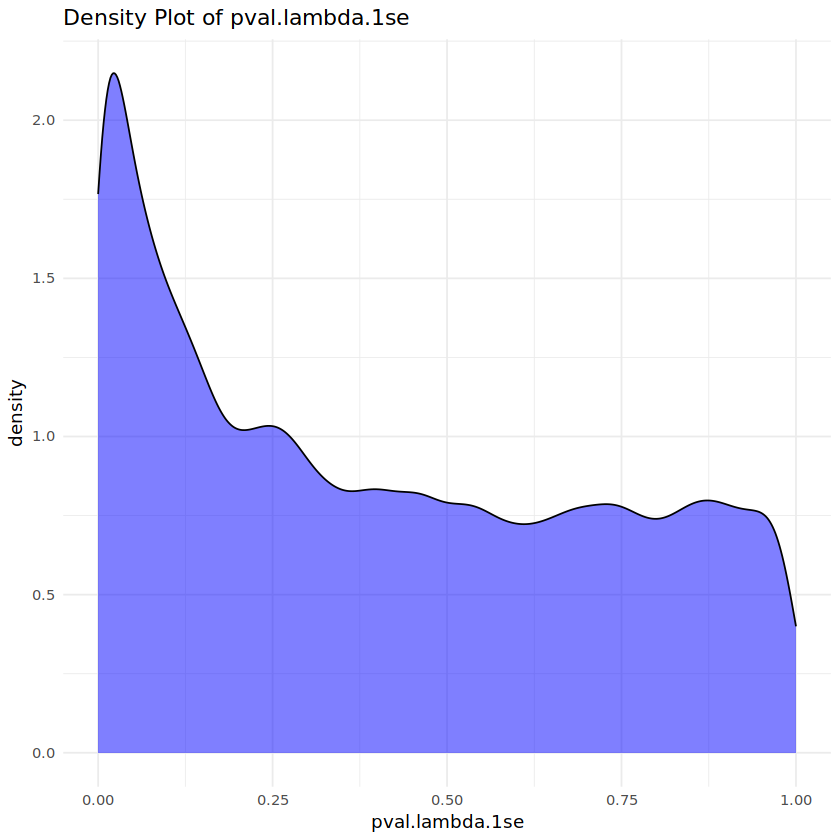

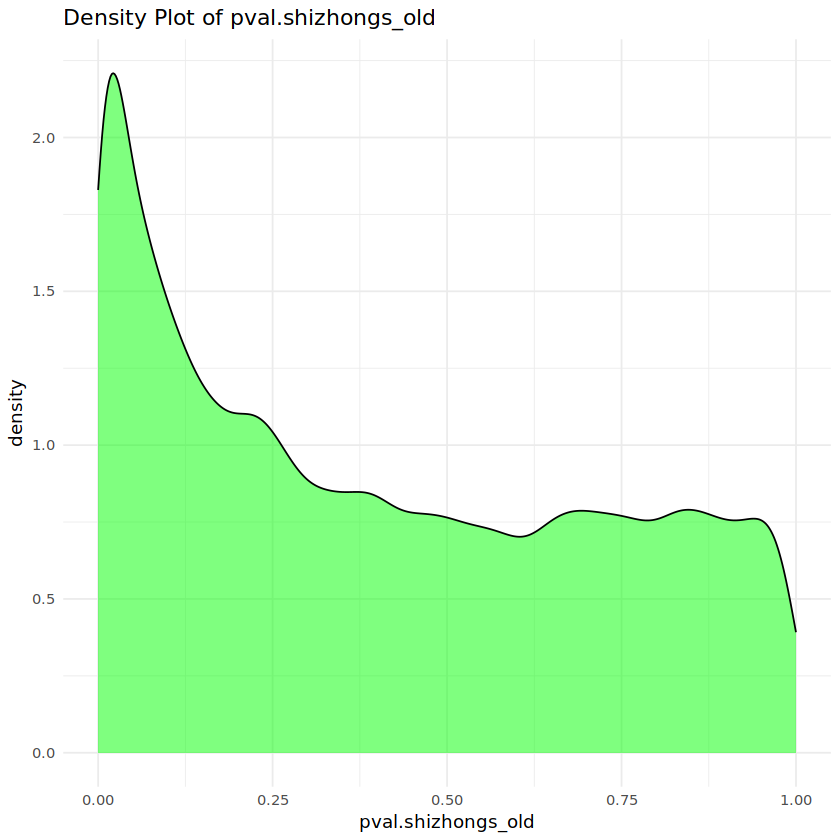

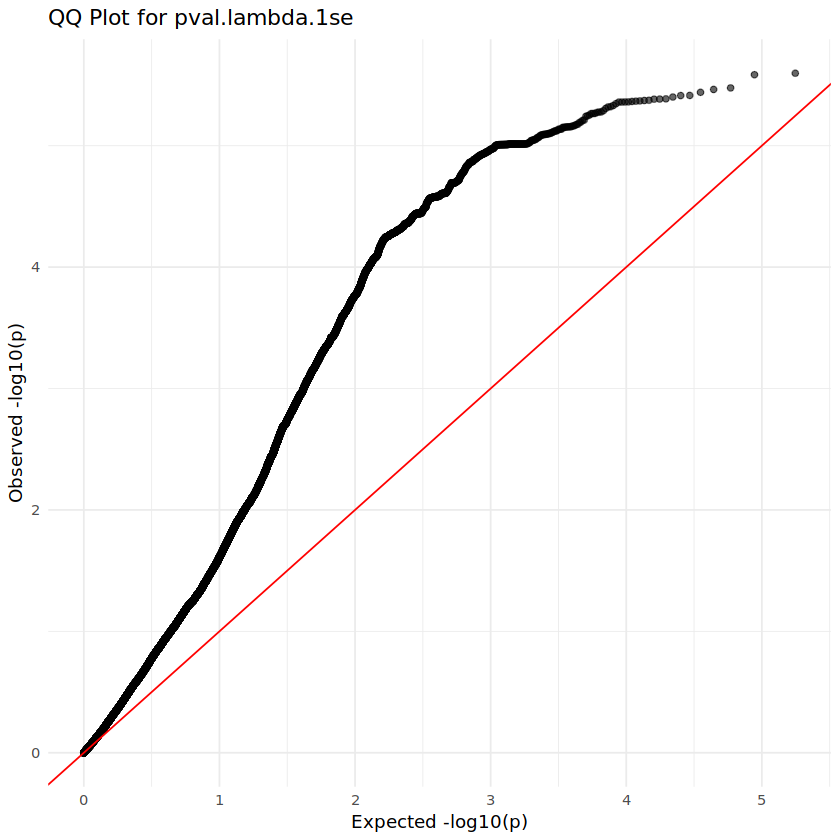

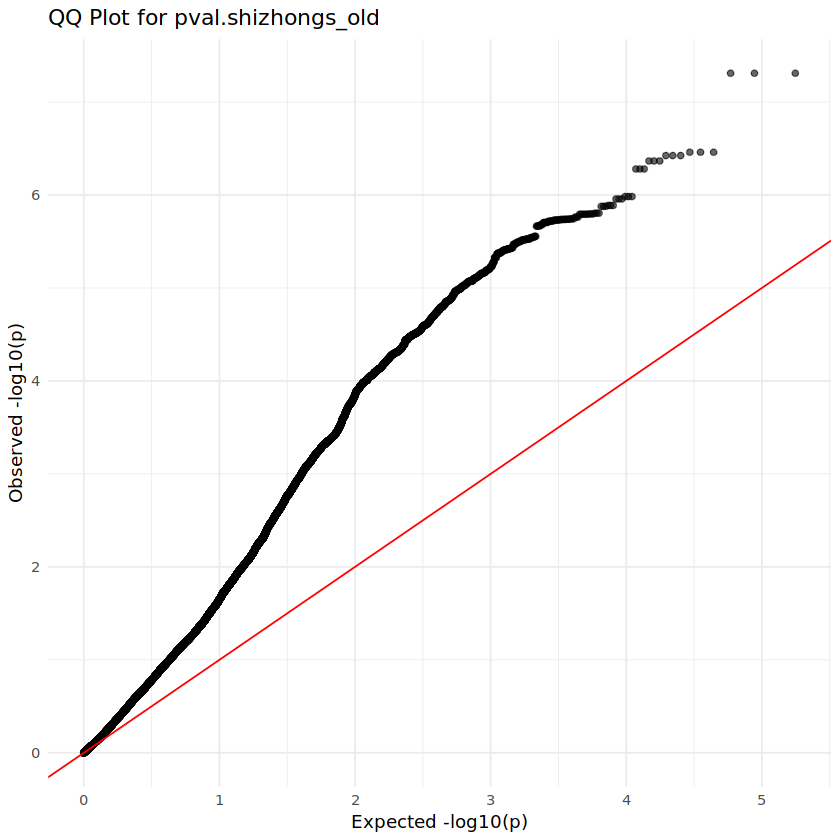

In [35]:
library(data.table)
library(ggplot2)
library(scales)
library(tidyr)

# Convert 'BP' to numeric
merged$BP <- as.numeric(merged$BP)

# Minimum p-values for reference
min_pval_lambda.1se <- min(merged$pval.lambda.1se, na.rm = TRUE)
min_pval_shizhongs_old <- min(merged$pval.shizhongs_old, na.rm = TRUE)

# Convert data to long format for plotting
df_long <- pivot_longer(merged, cols = c("pval.lambda.1se", "pval.shizhongs_old"), 
                        names_to = "variable", values_to = "pval")

# Scattergram plot
ggplot(df_long, aes(x = BP, y = -log10(pval), color = variable)) +
  geom_point(alpha = 0.6) +
  labs(x = "Genomic Position",
       y = "-log10(p-values)",
       title = paste("Scattergrams of MWAS p-values by Genomic Position\nCHR:", unique(merged$CHR)),
       subtitle = "Faceted by lambda type") +
  scale_color_manual(values = c("pval.lambda.1se" = "blue", "pval.shizhongs_old" = "green")) +
  facet_wrap(~ variable, scales = "free_y") +
  theme_minimal() + 
  ylim(c(0, 8))

# Histograms
ggplot(merged, aes(x = pval.lambda.1se)) +
  geom_histogram(binwidth = 0.05, fill = "blue", alpha = 0.7) +
  labs(title = "Histogram of pval.lambda.1se",
       x = "pval.lambda.1se",
       y = "Frequency") +
  theme_minimal()

ggplot(merged, aes(x = pval.shizhongs_old)) +
  geom_histogram(binwidth = 0.05, fill = "green", alpha = 0.7) +
  labs(title = "Histogram of pval.shizhongs_old",
       x = "pval.shizhongs_old",
       y = "Frequency") +
  theme_minimal()

# Density plots
ggplot(merged, aes(x = pval.lambda.1se)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Density Plot of pval.lambda.1se",
       x = "pval.lambda.1se") +
  theme_minimal()

ggplot(merged, aes(x = pval.shizhongs_old)) +
  geom_density(fill = "green", alpha = 0.5) +
  labs(title = "Density Plot of pval.shizhongs_old",
       x = "pval.shizhongs_old") +
  theme_minimal()

# QQ plots for GWAS p-values
qq_plot <- function(pvalues, title) {
  n <- length(pvalues)
  expected <- -log10((1:n) / (n + 1))
  observed <- -log10(sort(pvalues))
  ggplot(data.frame(Expected = expected, Observed = observed), aes(x = Expected, y = Observed)) +
    geom_point(alpha = 0.6) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    labs(title = title, x = "Expected -log10(p)", y = "Observed -log10(p)") +
    theme_minimal()
}

# QQ plot for pval.lambda.1se
qq_plot(merged$pval.lambda.1se, "QQ Plot for pval.lambda.1se")

# QQ plot for pval.shizhongs_old
qq_plot(merged$pval.shizhongs_old, "QQ Plot for pval.shizhongs_old")


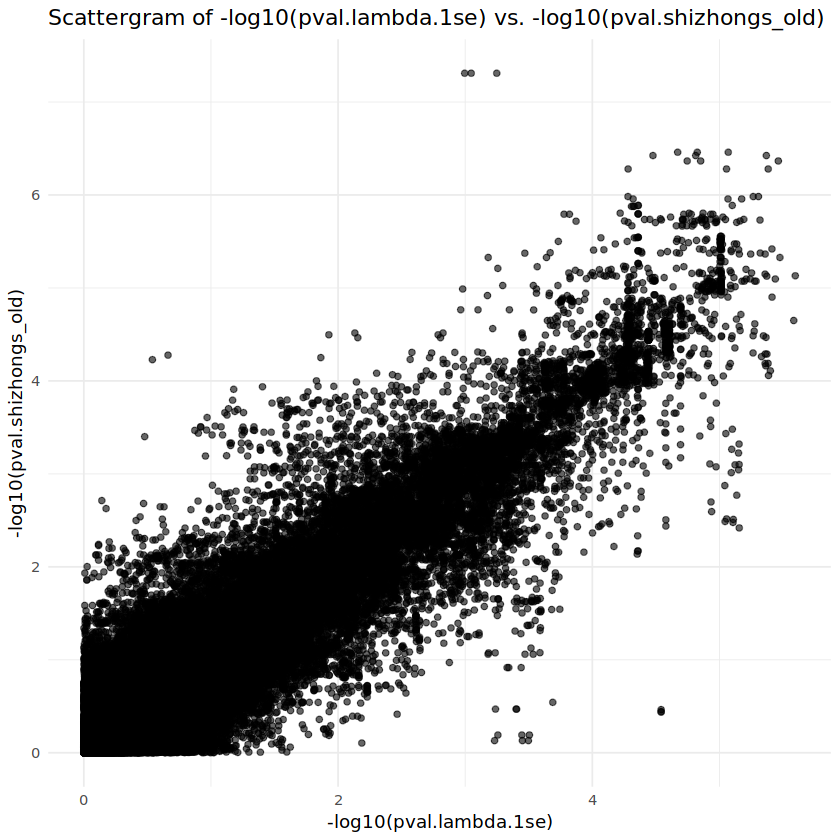

In [36]:
# Scattergram comparing the two types of p-values directly
ggplot(merged, aes(x = -log10(pval.lambda.1se), y = -log10(pval.shizhongs_old))) +
  geom_point(alpha = 0.6) +
  labs(x = "-log10(pval.lambda.1se)",
       y = "-log10(pval.shizhongs_old)",
       title = "Scattergram of -log10(pval.lambda.1se) vs. -log10(pval.shizhongs_old)") +
  theme_minimal()

In [38]:
library(ggpubr)

ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [37]:
# Scattergram comparing the two types of p-values directly with trendline and R^2
ggplot(merged, aes(x = -log10(pval.lambda.1se), y = -log10(pval.shizhongs_old))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add linear regression line
  labs(x = "-log10(pval.lambda.1se)",
       y = "-log10(pval.shizhongs_old)",
       title = "Scattergram of -log10(pval.lambda.1se) vs. -log10(pval.shizhongs_old)") +
  theme_minimal() +
  stat_cor(aes(label = paste(..rr.label.., sep = "~`,`~")), 
           label.x = 3, label.y = 8)  # Add R^2 value


ERROR: Error in stat_cor(aes(label = paste(..rr.label.., sep = "~`,`~")), label.x = 3, : could not find function "stat_cor"


`geom_smooth()` using formula = 'y ~ x'


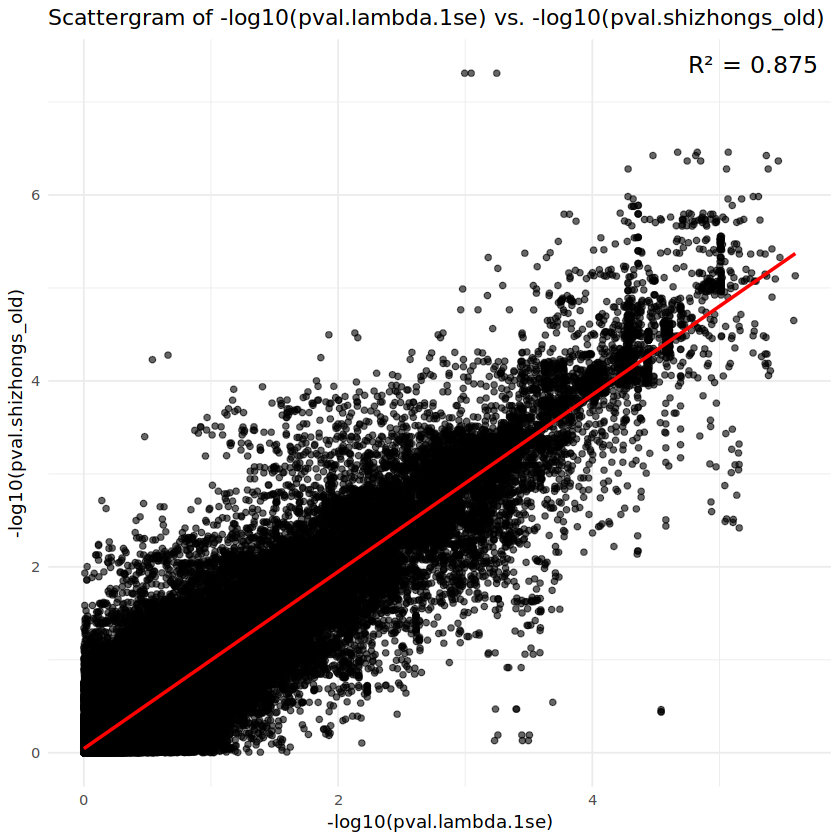

In [39]:
# Calculate -log10 for the p-values
merged$log_pval_lambda.1se <- -log10(merged$pval.lambda.1se)
merged$log_pval_shizhongs_old <- -log10(merged$pval.shizhongs_old)

# Fit a linear model to get R-squared
fit <- lm(log_pval_shizhongs_old ~ log_pval_lambda.1se, data = merged)
r_squared <- summary(fit)$r.squared

# Scattergram with trendline and R^2
ggplot(merged, aes(x = log_pval_lambda.1se, y = log_pval_shizhongs_old)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add linear regression line
  labs(x = "-log10(pval.lambda.1se)",
       y = "-log10(pval.shizhongs_old)",
       title = "Scattergram of -log10(pval.lambda.1se) vs. -log10(pval.shizhongs_old)") +
  theme_minimal() +
  annotate("text", x = Inf, y = Inf, label = paste0("R² = ", round(r_squared, 3)),
           hjust = 1.1, vjust = 2, size = 5, color = "black")  # Display R^2 value


`geom_smooth()` using formula = 'y ~ x'


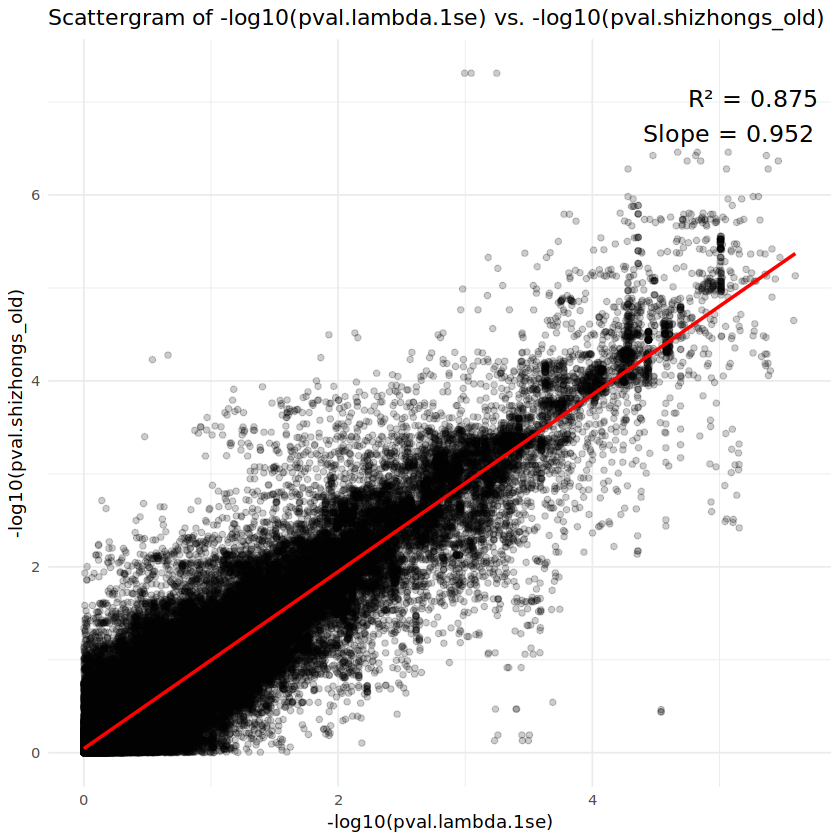

In [40]:
# Calculate -log10 for the p-values
merged$log_pval_lambda.1se <- -log10(merged$pval.lambda.1se)
merged$log_pval_shizhongs_old <- -log10(merged$pval.shizhongs_old)

# Fit a linear model to get R-squared and slope
fit <- lm(log_pval_shizhongs_old ~ log_pval_lambda.1se, data = merged)
r_squared <- summary(fit)$r.squared
slope <- coef(fit)[2]

# Scattergram with trendline, R², and slope
ggplot(merged, aes(x = log_pval_lambda.1se, y = log_pval_shizhongs_old)) +
  geom_point(alpha = 0.2) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add linear regression line
  labs(x = "-log10(pval.lambda.1se)",
       y = "-log10(pval.shizhongs_old)",
       title = "Scattergram of -log10(pval.lambda.1se) vs. -log10(pval.shizhongs_old)") +
  theme_minimal() +
  annotate("text", x = Inf, y = Inf, label = paste0("R² = ", round(r_squared, 3), 
                                                    "\nSlope = ", round(slope, 3)),
           hjust = 1.1, vjust = 2, size = 5, color = "black")  # Display R² and slope


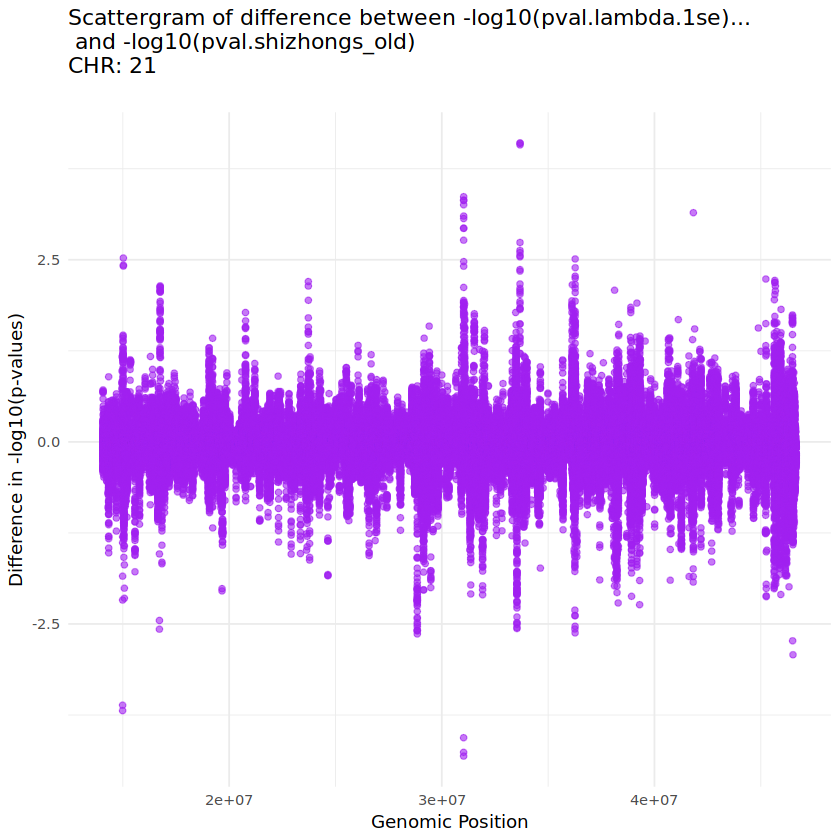

In [46]:
# Calculate -log10 for the p-values
merged$log_pval_lambda.1se <- -log10(merged$pval.lambda.1se)
merged$log_pval_shizhongs_old <- -log10(merged$pval.shizhongs_old)

# Calculate the difference between the two p-values
merged$log_pval_diff <- merged$log_pval_lambda.1se - merged$log_pval_shizhongs_old

# Fit a linear model of the difference as a function of genomic position (BP)
fit_diff <- lm(log_pval_diff ~ BP, data = merged)
r_squared_diff <- summary(fit_diff)$r.squared
slope_diff <- coef(fit_diff)[2]

# Scattergram plot of the difference
ggplot(merged, aes(x = BP, y = log_pval_diff)) +
  geom_point(alpha = 0.6, color = "purple") +
  #geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add linear regression line
  labs(x = "Genomic Position",
       y = "Difference in -log10(p-values)",
       title = paste("Scattergram of difference between -log10(pval.lambda.1se)...\n and -log10(pval.shizhongs_old)\nCHR:", unique(merged$CHR)),
       subtitle = paste("")) +
  theme_minimal()


In [ ]:
Sys.time()

## Check these sites on chr 7

In [ ]:
# Shizhong's original result

# chr7    1987910 10.1255085321387        4.25759742738181e-24
# chr7    1987896 10.1255085321387        4.25759742738189e-24
# chr7    1987797 10.0241523897721        1.19379483108027e-23
# chr7    1987778 10.0105851568856        1.36940148731912e-23

In [ ]:
selected_pos <- c(1987910, 1987896, 1987797, 1987778)

In [ ]:
head(merged)

In [ ]:
merged[which(merged$BP %in% selected_pos), ]

In [ ]:
# > min(p_values)
# [1] 1.299095e-59

In [ ]:
aa